In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Read the CSV file into a pandas DataFrame
dataset = pd.read_csv('RIVN.csv')

# Convert the 'Date' column to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Assuming 'Open' is the column containing opening prices
# You may need to adjust the column name as per your actual dataset
date = dataset['Date']
open_prices = dataset['Open']


In [17]:

x = dataset.iloc[:,2:].values
x = dataset.iloc[:, [0] + list(range(2, len(dataset.columns)))]
y = dataset.iloc[:,1].values


In [18]:
split_index = int(len(dataset) * 0.85)  # Splitting at 80% of the dataset length

# Splitting into train and test sets
X_train, X_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


X_training = X_train.iloc[:,1:].values

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score



regressor = DecisionTreeRegressor(random_state = 0)

regressor.fit(X_training, y_train)
y_pred = regressor.predict(X_test.iloc[:,1:].values)
r2score = r2_score(y_test, y_pred)
print(f'R2 Score: {r2score}')


R2 Score: 0.7433885452352599


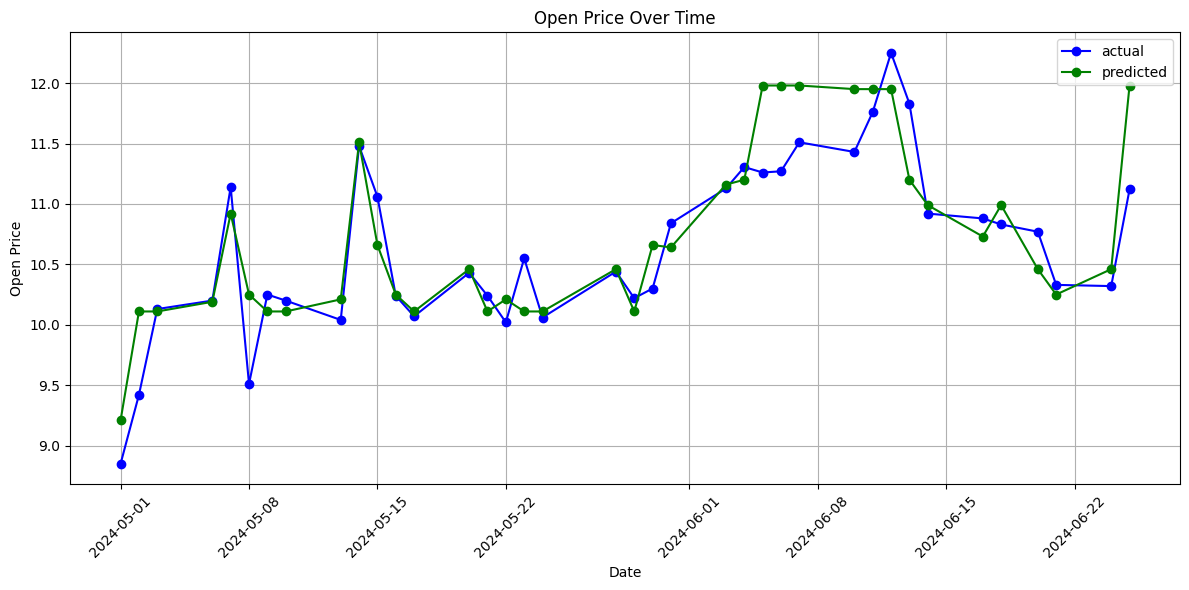

In [20]:
# Plotting the data
plt.figure(figsize=(12, 6))

plt.plot(X_test['Date'], y_test, marker='o', linestyle='-', color='b', label='actual')
plt.plot(X_test['Date'], y_pred, marker='o', linestyle='-', color='green', label='predicted')


# Add labels and title
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Price Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()
